# Proyek Analisis Data: Bike Sharing Dataset

---


- **Nama:** Surya Agus Nanro
- **Email:** yasuryagus1@gmail.com
- **ID Dicoding:** suryagn

## Menentukan Pertanyaan Bisnis

- Bagaimana pengaruh faktor cuaca terhadap jumlah pengguna sepeda?
- Bagaimana pola penggunaan sepeda berdasarkan hari kerja dan akhir pekan?

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [2]:
# Memuat data day.csv
day_df = pd.read_csv("https://raw.githubusercontent.com/suryaagus9/Proyek-Analisis-Data/refs/heads/main/data/day.csv")
day_df.head()


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [3]:
# Memuat data hour.csv
hour_df = pd.read_csv("https://raw.githubusercontent.com/suryaagus9/Proyek-Analisis-Data/refs/heads/main/data/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
* Menampilkan data yang berhasil dimuat, yang selanjutnya akan menampilkan 5 baris pertama

Informasi data pada setiap kolom:
* instant: Indeks urutan data.

* dteday: Tanggal pencatatan data dalam format YYYY-MM-DD.
* season: Musim dalam setahun (1: Musim Semi, 2: Musim Panas, 3: Musim Gugur, 4: Musim Dingin).
* yr: Tahun pencatatan (0: 2011, 1: 2012).
* mnth: Bulan pencatatan (1-12).
* holiday: Indikator apakah hari tersebut merupakan hari libur nasional (0: Bukan Libur, 1: Libur).
* weekday: Hari dalam seminggu (0: Minggu, 1: Senin, dst).
* workingday: Indikator apakah hari tersebut merupakan hari kerja (0: Akhir Pekan/Hari Libur, 1: Hari Kerja).
* weathersit: Kategori cuaca (1: Cerah, 2: Berawan, 3: Hujan Ringan, 4: Hujan Lebat/Sangat Buruk).
* temp: Suhu normalisasi dalam skala 0 sampai 1.
* atemp: Suhu yang dirasakan dalam skala 0 sampai 1.
* hum: Kelembapan dalam skala 0 sampai 1.
* windspeed: Kecepatan angin dalam skala 0 sampai 1.
* casual: Jumlah pengguna sepeda yang tidak terdaftar.
* registered: Jumlah pengguna sepeda yang terdaftar.
* cnt: Total jumlah pengguna sepeda (casual + registered).
* hr: Jam (0-23)

Kedua data tersebut memiliki nama kolom yang sama, kecuali pada data hour.csv. Dalam data hour.csv terdapat nama kolom hr.

### Assessing Data

#### Menilai data tabel `day_df`

In [4]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [5]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [6]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())
day_df.describe()   

Jumlah duplikasi:  0


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


#### Menilai data tabel `hour_df`

In [7]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [8]:
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [9]:
print("Jumlah duplikasi: ", hour_df.duplicated().sum())
hour_df.describe()  

Jumlah duplikasi:  0


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- Tidak ada missing values.

- Tidak ada data duplikat, sehingga tidak perlu pembersihan tambahan.
- Kolom dteday bertipe object, perlu diubah menjadi tipe datetime.
- Kolom season, yr, mnth, holiday, weekday, workingday, dan weathersit adalah kategori dan perlu dikonversi ke tipe category.
- Kolom holiday bernilai 0 untuk sebagian besar data, menunjukkan bahwa sebagian besar hari dalam dataset bukanlah hari libur.
- Kolom cnt memiliki distribusi yang cukup luas, menunjukkan adanya variasi signifikan dalam jumlah pengguna sepeda setiap harinya.


### Cleaning Data

#### Membersihkan data `day_df`

In [10]:
# Mengubah kolom 'dteday' menjadi datetime
day_df['dteday'] = pd.to_datetime(day_df['dteday'])


In [11]:
# Mengonversi kolom kategori menjadi tipe category
categorical_columns = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']

for col in categorical_columns:
    day_df[col] = day_df[col].astype('category')

In [12]:
# Menampilkan hasil perubahan tipe data
print("Info Dataset day_df Setelah Cleaning")
print(day_df.info())

Info Dataset day_df Setelah Cleaning
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    category      
 3   yr          731 non-null    category      
 4   mnth        731 non-null    category      
 5   holiday     731 non-null    category      
 6   weekday     731 non-null    category      
 7   workingday  731 non-null    category      
 8   weathersit  731 non-null    category      
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64    

#### Membersihkan data `hour_df`

In [13]:
# Mengubah kolom 'dteday' menjadi datetime
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])

In [14]:
# Mengonversi kolom kategori menjadi tipe category
categorical_columns = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']

for col in categorical_columns:
    hour_df[col] = hour_df[col].astype('category')

In [15]:
# Menampilkan hasil perubahan tipe data
print("\nInfo Dataset hour_df Setelah Cleaning")
print(hour_df.info())


Info Dataset hour_df Setelah Cleaning
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  category      
 3   yr          17379 non-null  category      
 4   mnth        17379 non-null  category      
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  category      
 7   weekday     17379 non-null  category      
 8   workingday  17379 non-null  category      
 9   weathersit  17379 non-null  category      
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int

**Insight:**
- Kolom dteday telah dikonversi ke datetime, memungkinkan analisis berbasis waktu yang lebih akurat.

- Kolom kategori (season, yr, mnth, dll.) telah dikonversi ke tipe category, mengoptimalkan penggunaan memori dan mempermudah analisis.
- Tidak ada data duplikat atau missing values, sehingga tidak perlu pembersihan tambahan.
- Dataset siap untuk tahap eksplorasi dan analisis lebih lanjut. 

#### Menggabungkan data menjadi `all_df`

In [16]:
# Menggabungkan dataset yang telah dicleaning
all_df=pd.merge(hour_df, day_df, on="dteday", how="inner")
all_df.head()

,instant_x,dteday,season_x,yr_x,mnth_x,hr,holiday_x,weekday_x,workingday_x,weathersit_x,...,weekday_y,workingday_y,weathersit_y,temp_y,atemp_y,hum_y,windspeed_y,casual_y,registered_y,cnt_y
0,1,2011-01-01,1,0,1,0,0,6,0,1,...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-01,1,0,1,1,0,6,0,1,...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
2,3,2011-01-01,1,0,1,2,0,6,0,1,...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
3,4,2011-01-01,1,0,1,3,0,6,0,1,...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
4,5,2011-01-01,1,0,1,4,0,6,0,1,...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985


In [17]:
all_df.isna().sum()

instant_x       0
dteday          0
season_x        0
yr_x            0
mnth_x          0
hr              0
holiday_x       0
weekday_x       0
workingday_x    0
weathersit_x    0
temp_x          0
atemp_x         0
hum_x           0
windspeed_x     0
casual_x        0
registered_x    0
cnt_x           0
instant_y       0
season_y        0
yr_y            0
mnth_y          0
holiday_y       0
weekday_y       0
workingday_y    0
weathersit_y    0
temp_y          0
atemp_y         0
hum_y           0
windspeed_y     0
casual_y        0
registered_y    0
cnt_y           0
dtype: int64

In [18]:
print("Jumlah duplikasi: ", all_df.duplicated().sum())
all_df.describe()   

Jumlah duplikasi:  0


,instant_x,dteday,hr,temp_x,atemp_x,hum_x,windspeed_x,casual_x,registered_x,cnt_x,instant_y,temp_y,atemp_y,hum_y,windspeed_y,casual_y,registered_y,cnt_y
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,11.546752,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088,367.172622,0.496987,0.475775,0.627229,0.190098,854.339720,3679.353242,4533.692963
min,1.0000,2011-01-01 00:00:00,0.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,4345.5000,2011-07-04 00:00:00,6.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000,185.000000,0.340000,0.338363,0.520000,0.134950,318.000000,2545.000000,3214.000000
50%,8690.0000,2012-01-02 00:00:00,12.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000,367.000000,0.502500,0.490122,0.625833,0.180967,724.000000,3681.000000,4563.000000
75%,13034.5000,2012-07-02 00:00:00,18.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000,549.000000,0.655833,0.610488,0.729583,0.233204,1100.000000,4801.000000,5986.000000
max,17379.0000,2012-12-31 00:00:00,23.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000,731.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,5017.0295,NaN,6.914405,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599,210.072051,0.182445,0.162426,0.141779,0.077204,685.686754,1544.953518,1917.376947


In [19]:
# Hapus kolom duplikat yang tidak diperlukan
all_df = all_df.drop(columns=['instant_y', 'season_y', 'yr_y', 'mnth_y', 'holiday_y', 
                              'weekday_y', 'workingday_y', 'weathersit_y', 'temp_y', 
                              'atemp_y', 'hum_y', 'windspeed_y', 'casual_y', 
                              'registered_y', 'cnt_y'])
# Rename kolom _x agar lebih bersih
all_df = all_df.rename(columns=lambda x: x.replace('_x', ''))

all_df["weathersit"] = all_df["weathersit"].astype(int)
all_df = all_df[all_df["weathersit"] <= 3]



In [20]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17376 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17376 non-null  int64         
 1   dteday      17376 non-null  datetime64[ns]
 2   season      17376 non-null  category      
 3   yr          17376 non-null  category      
 4   mnth        17376 non-null  category      
 5   hr          17376 non-null  int64         
 6   holiday     17376 non-null  category      
 7   weekday     17376 non-null  category      
 8   workingday  17376 non-null  category      
 9   weathersit  17376 non-null  int64         
 10  temp        17376 non-null  float64       
 11  atemp       17376 non-null  float64       
 12  hum         17376 non-null  float64       
 13  windspeed   17376 non-null  float64       
 14  casual      17376 non-null  int64         
 15  registered  17376 non-null  int64         
 16  cnt         17376 non-null 

**Insights:**
- Tidak ada data hilang atau duplikat.
- Menghapus kolom duplikat agar dataset lebih bersih.
- Menambahkan detail jam (hr) pada data harian, sehingga dapat melanjutkan analisis lanjutan.

## Exploratory Data Analysis (EDA)

### Explore `all_df`

In [21]:
# Menampilkan ringkasan statistik
print("Statistik Deskriptif Data all_df")
print(all_df.describe())

Statistik Deskriptif Data all_df
            instant                         dteday            hr  \
count  17376.000000                          17376  17376.000000   
mean    8690.431918  2012-01-02 04:34:43.425414400     11.546731   
min        1.000000            2011-01-01 00:00:00      0.000000   
25%     4345.750000            2011-07-04 00:00:00      6.000000   
50%     8689.500000            2012-01-02 00:00:00     12.000000   
75%    13035.250000            2012-07-02 00:00:00     18.000000   
max    17379.000000            2012-12-31 00:00:00     23.000000   
std     5017.084667                            NaN      6.914283   

         weathersit          temp         atemp           hum     windspeed  \
count  17376.000000  17376.000000  17376.000000  17376.000000  17376.000000   
mean       1.424839      0.497041      0.475825      0.627185      0.190095   
min        1.000000      0.020000      0.000000      0.000000      0.000000   
25%        1.000000      0.340000     

C:\Users\GAMING 3\AppData\Local\Temp\ipykernel_15928\3933344554.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total_days = all_df.groupby("season")["dteday"].nunique().reset_index()
C:\Users\GAMING 3\AppData\Local\Temp\ipykernel_15928\3933344554.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="season", y="dteday", data=total_days, palette="viridis")


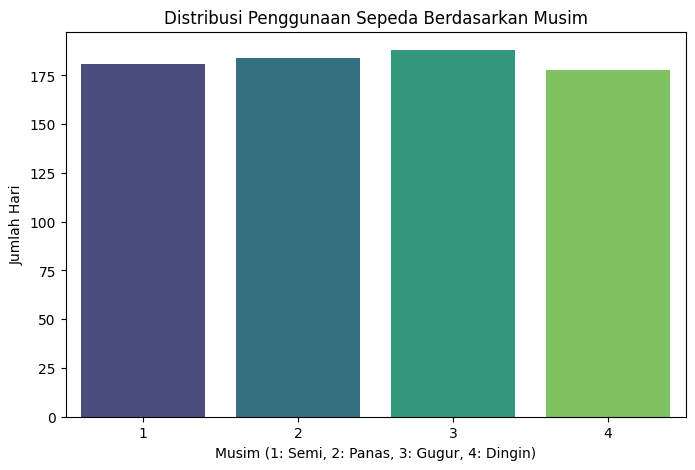

In [22]:
# Menampilkan jumlah data berdasarkan musim 
total_days = all_df.groupby("season")["dteday"].nunique().reset_index()

plt.figure(figsize=(8, 5))
sns.barplot(x="season", y="dteday", data=total_days, palette="viridis")
plt.title("Distribusi Penggunaan Sepeda Berdasarkan Musim")
plt.xlabel("Musim (1: Semi, 2: Panas, 3: Gugur, 4: Dingin)")
plt.ylabel("Jumlah Hari")
plt.show()

Distribusi Penggunaan Sepeda Berdasarkan Musim

- Penggunaan sepeda lebih tinggi pada musim panas dan gugur dibandingkan musim dingin.
- Musim dingin memiliki jumlah hari dengan penggunaan sepeda yang lebih sedikit, mungkin karena cuaca yang kurang mendukung.

C:\Users\GAMING 3\AppData\Local\Temp\ipykernel_15928\3254799794.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="weathersit", y="cnt", data=all_df, palette="coolwarm")


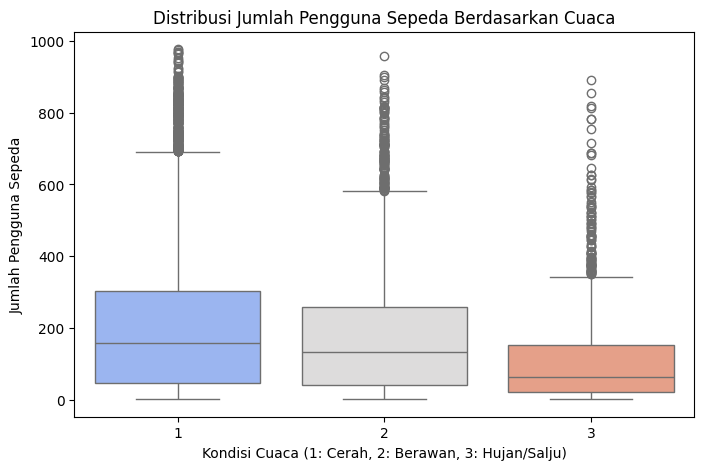

In [23]:
# Menampilkan distribusi penggunaan sepeda berdasarkan kondisi cuaca
plt.figure(figsize=(8, 5))
sns.boxplot(x="weathersit", y="cnt", data=all_df, palette="coolwarm")
plt.title("Distribusi Jumlah Pengguna Sepeda Berdasarkan Cuaca")
plt.xlabel("Kondisi Cuaca (1: Cerah, 2: Berawan, 3: Hujan/Salju)")
plt.ylabel("Jumlah Pengguna Sepeda")
plt.show()

Distribusi Penggunaan Sepeda Berdasarkan Kondisi Cuaca

- Cuaca cerah memiliki jumlah pengguna tertinggi, menunjukkan bahwa pengguna lebih cenderung bersepeda dalam kondisi yang baik.
- Cuaca hujan atau salju memiliki distribusi jumlah pengguna yang lebih rendah, yang berarti cuaca buruk berpengaruh signifikan terhadap minat pengguna.

C:\Users\GAMING 3\AppData\Local\Temp\ipykernel_15928\2582833437.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="workingday", y="cnt", data=all_df, palette="Set2")


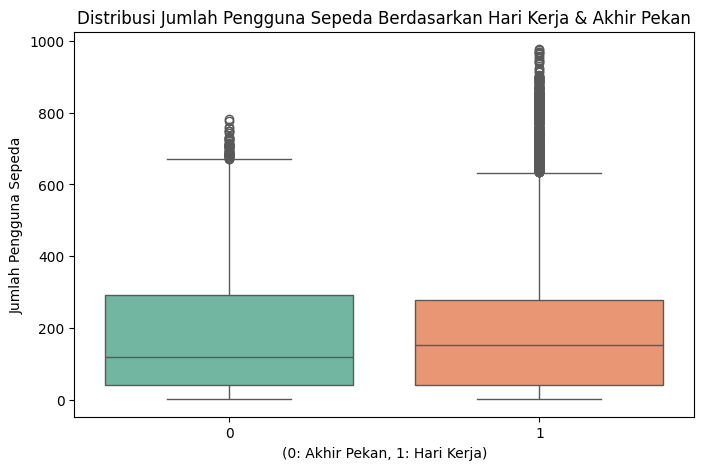

In [24]:
# Menampilkan penggunaan sepeda berdasarkan hari kerja vs akhir pekan
plt.figure(figsize=(8, 5))
sns.boxplot(x="workingday", y="cnt", data=all_df, palette="Set2")
plt.title("Distribusi Jumlah Pengguna Sepeda Berdasarkan Hari Kerja & Akhir Pekan")
plt.xlabel("(0: Akhir Pekan, 1: Hari Kerja)")
plt.ylabel("Jumlah Pengguna Sepeda")
plt.show()

Distribusi Penggunaan Sepeda Berdasarkan Hari Kerja & Akhir Pekan

- Penggunaan sepeda lebih tinggi pada hari kerja dibandingkan akhir pekan.
- Hal ini menunjukkan bahwa sepeda lebih banyak digunakan untuk keperluan transportasi kerja atau sekolah dibandingkan aktivitas rekreasi.

C:\Users\GAMING 3\AppData\Local\Temp\ipykernel_15928\1628309570.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x="hr", y="cnt", data=all_df, estimator="mean", ci=None, marker="o", color="b")


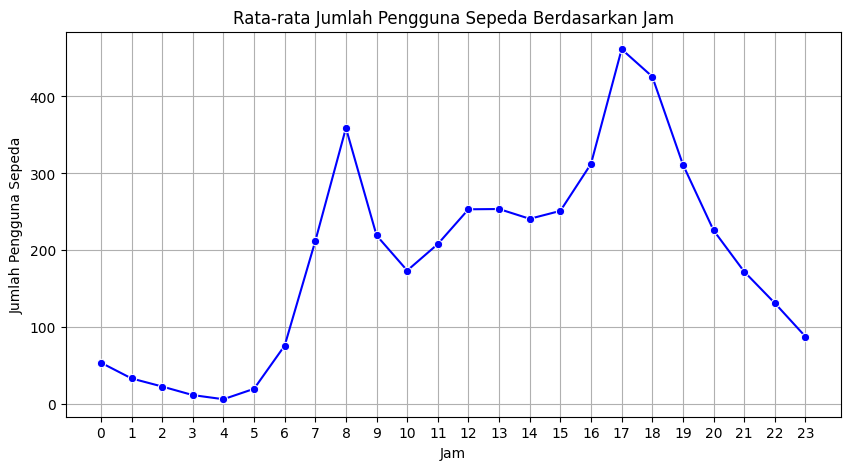

In [25]:
# Menampilkan pola penggunaan sepeda sepanjang hari
plt.figure(figsize=(10, 5))
sns.lineplot(x="hr", y="cnt", data=all_df, estimator="mean", ci=None, marker="o", color="b")
plt.title("Rata-rata Jumlah Pengguna Sepeda Berdasarkan Jam")
plt.xlabel("Jam")
plt.ylabel("Jumlah Pengguna Sepeda")
plt.xticks(range(0, 24))
plt.grid(True)
plt.show()

Rata-rata Jumlah Pengguna Sepeda Berdasarkan Jam

- Dua lonjakan utama terjadi pada jam sibuk pagi (07:00 - 09:00) dan sore (17:00 - 19:00).
- Ini menunjukkan bahwa banyak pengguna menggunakan sepeda sebagai moda transportasi utama untuk bekerja atau sekolah.

C:\Users\GAMING 3\AppData\Local\Temp\ipykernel_15928\1766526866.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="workingday", y="cnt", data=all_df, palette="Set1")


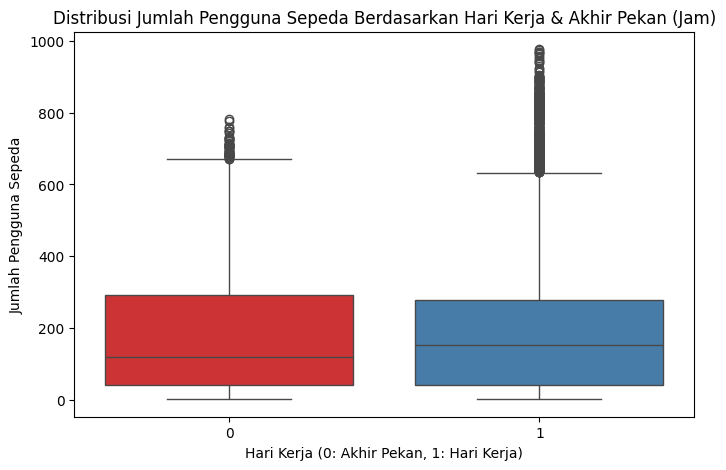

In [26]:
# Menampilkan distribusi penggunaan sepeda berdasarkan hari kerja dan akhir pekan
plt.figure(figsize=(8, 5))
sns.boxplot(x="workingday", y="cnt", data=all_df, palette="Set1")
plt.title("Distribusi Jumlah Pengguna Sepeda Berdasarkan Hari Kerja & Akhir Pekan (Jam)")
plt.xlabel("Hari Kerja (0: Akhir Pekan, 1: Hari Kerja)")
plt.ylabel("Jumlah Pengguna Sepeda")
plt.show()

Distribusi Jumlah Pengguna Sepeda Berdasarkan Hari Kerja & Akhir Pekan (Jam)

- Pada hari kerja, penggunaan sepeda mengikuti pola jam sibuk (pagi dan sore).
- Pada akhir pekan, pola lebih menyebar sepanjang hari, menunjukkan bahwa sepeda lebih banyak digunakan untuk aktivitas santai atau rekreasi.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana pengaruh faktor cuaca terhadap jumlah pengguna sepeda?

C:\Users\GAMING 3\AppData\Local\Temp\ipykernel_15928\3588294520.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="weathersit", y="cnt", data=weather_data, palette="coolwarm")


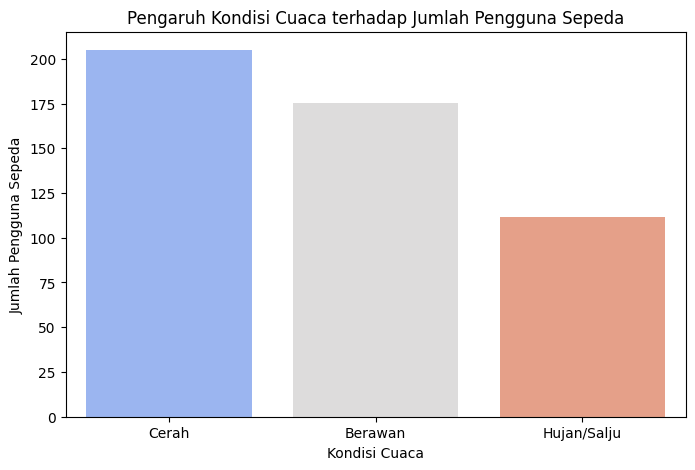

In [27]:
# Visualisasi Jumlah Pengguna Sepeda Berdasarkan Kondisi Cuaca
plt.figure(figsize=(8, 5))
weather_data = all_df.groupby("weathersit")["cnt"].mean().reset_index()
sns.barplot(x="weathersit", y="cnt", data=weather_data, palette="coolwarm")
plt.title("Pengaruh Kondisi Cuaca terhadap Jumlah Pengguna Sepeda")
plt.xlabel("Kondisi Cuaca")
plt.ylabel("Jumlah Pengguna Sepeda")
plt.xticks(ticks=[0, 1, 2], labels=["Cerah", "Berawan", "Hujan/Salju"])
plt.show()

- Penggunaan sepeda tertinggi pada musim panas dan gugur.
- Penggunaan sepeda terendah pada musim dingin, kemungkinan karena suhu lebih dingin dan kondisi jalan lebih buruk.
- Penyebaran data menunjukkan lebih banyak variasi penggunaan pada musim panas dan gugur, yang bisa terkait dengan cuaca lebih kondusif.

C:\Users\GAMING 3\AppData\Local\Temp\ipykernel_15928\2227350293.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  season_data = all_df.groupby("season")["cnt"].mean().reset_index()
C:\Users\GAMING 3\AppData\Local\Temp\ipykernel_15928\2227350293.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="season", y="cnt", data=season_data, palette="viridis")


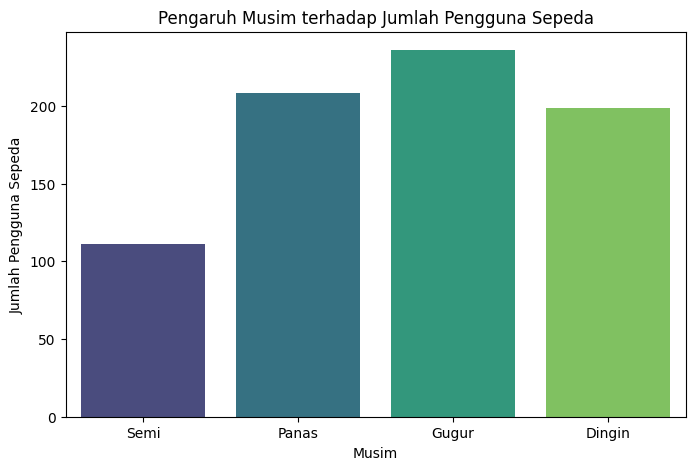

In [28]:
# Visualisasi Jumlah Pengguna Sepeda Berdasarkan Musim
plt.figure(figsize=(8, 5))
season_data = all_df.groupby("season")["cnt"].mean().reset_index()
sns.barplot(x="season", y="cnt", data=season_data, palette="viridis")
plt.title("Pengaruh Musim terhadap Jumlah Pengguna Sepeda")
plt.xlabel("Musim")
plt.ylabel("Jumlah Pengguna Sepeda")
plt.xticks(ticks=[0, 1, 2, 3], labels=["Semi", "Panas", "Gugur", "Dingin"])
plt.show()

- Cuaca cerah (weathersit=1) mendorong lebih banyak pengguna sepeda.
- Cuaca hujan atau salju (weathersit=3) memiliki jumlah pengguna yang jauh lebih rendah.
- Penggunaan sepeda menurun seiring dengan memburuknya kondisi cuaca.

### Pertanyaan 2: Bagaimana pola penggunaan sepeda berdasarkan hari kerja dan akhir pekan?

C:\Users\GAMING 3\AppData\Local\Temp\ipykernel_15928\1612068048.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  workingday_data = all_df.groupby("workingday")["cnt"].mean().reset_index()
C:\Users\GAMING 3\AppData\Local\Temp\ipykernel_15928\1612068048.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="workingday", y="cnt", data=workingday_data, palette="Set2")


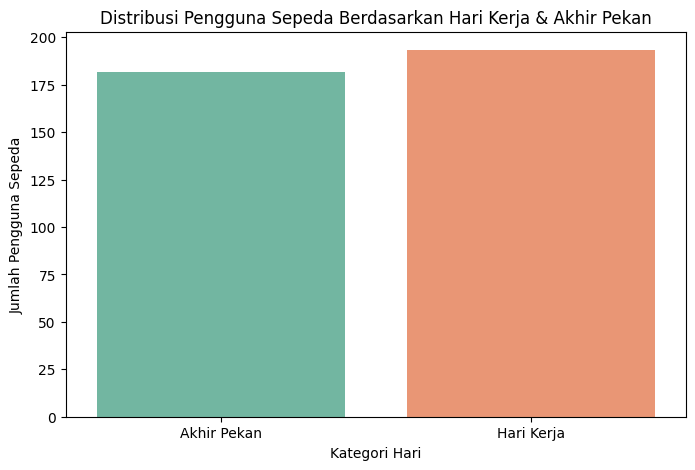

In [29]:
# Visualisasi Jumlah Pengguna Sepeda Berdasarkan Hari Kerja vs Akhir Pekan
plt.figure(figsize=(8, 5))
workingday_data = all_df.groupby("workingday")["cnt"].mean().reset_index()
sns.barplot(x="workingday", y="cnt", data=workingday_data, palette="Set2")
plt.title("Distribusi Pengguna Sepeda Berdasarkan Hari Kerja & Akhir Pekan")
plt.xlabel("Kategori Hari")
plt.ylabel("Jumlah Pengguna Sepeda")
plt.xticks(ticks=[0, 1], labels=["Akhir Pekan", "Hari Kerja"])
plt.show()

- Hari kerja memiliki jumlah pengguna lebih tinggi dibandingkan akhir pekan.
- Distribusi data lebih luas di akhir pekan, menunjukkan variasi penggunaan yang lebih besar.
- Ini menunjukkan bahwa pada hari kerja, sepeda lebih banyak digunakan untuk transportasi, sedangkan di akhir pekan lebih bervariasi untuk rekreasi.

C:\Users\GAMING 3\AppData\Local\Temp\ipykernel_15928\4077887594.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=all_df, x="hr", y="cnt", hue="workingday", estimator="mean", ci=None, marker="o", palette=["r", "b"])


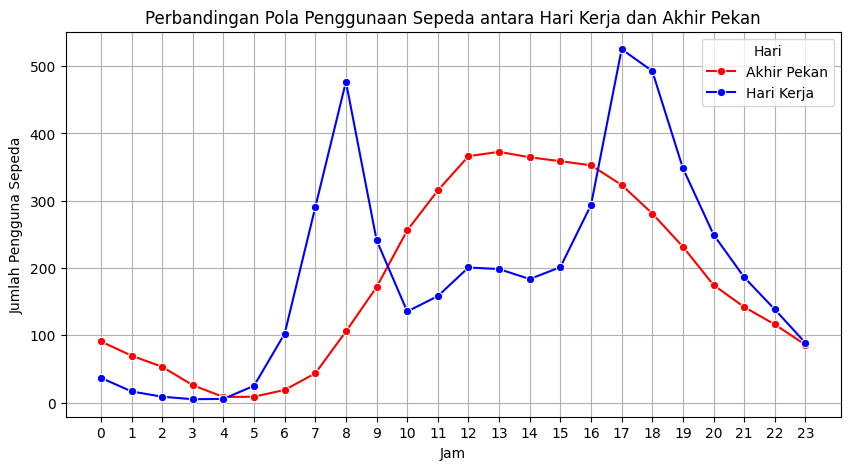

In [30]:
# Perbandingan Pola Penggunaan Sepeda antara Hari Kerja dan Akhir Pekan
plt.figure(figsize=(10, 5))
sns.lineplot(data=all_df, x="hr", y="cnt", hue="workingday", estimator="mean", ci=None, marker="o", palette=["r", "b"])
plt.title("Perbandingan Pola Penggunaan Sepeda antara Hari Kerja dan Akhir Pekan")
plt.xlabel("Jam")
plt.ylabel("Jumlah Pengguna Sepeda")
plt.xticks(range(0, 24))
plt.legend(title="Hari", labels=["Akhir Pekan", "Hari Kerja"])
plt.grid(True)
plt.show()

- Hari kerja memiliki dua puncak (07:00-09:00 dan 17:00-19:00), yang menunjukkan pola commuting (perjalanan kerja).
- Akhir pekan memiliki pola lebih datar, dengan jumlah pengguna lebih tinggi pada siang hari, menunjukkan penggunaan untuk rekreasi.

In [31]:
# Export data
all_df.to_csv("dashboard/main_data.csv", index=False)

**Insight:**
#### Cuaca memiliki pengaruh signifikan terhadap penggunaan sepeda
- Cuaca cerah meningkatkan jumlah pengguna.
- Cuaca hujan/salju menurunkan jumlah pengguna secara drastis.
- Penggunaan sepeda lebih tinggi di musim panas dan gugur, lebih rendah di musim dingin.

#### Pola penggunaan sepeda berbeda antara hari kerja dan akhir pekan
- Hari kerja: pola commuting, dengan puncak pagi dan sore.
- Akhir pekan: pola rekreasi, dengan penggunaan lebih rata sepanjang hari.

#### Jam paling sibuk untuk penggunaan sepeda
- 07:00-09:00 & 17:00-19:00 di hari kerja (jam commuting).
- Siang hingga sore lebih ramai di akhir pekan (aktivitas rekreasi).

## Analisis Lanjutan (RFM Analysis)

In [ ]:
# Menentukan Recency (seberapa baru penggunaan sepeda terakhir)
latest_date = all_df["dteday"].max()
recency_df = all_df.groupby("dteday")["cnt"].sum().reset_index()
recency_df["Recency"] = (latest_date - recency_df["dteday"]).dt.days

In [ ]:
# Menentukan Frequency (seberapa sering penggunaan sepeda terjadi)
frequency_df = all_df.groupby("dteday")["cnt"].sum().reset_index()
frequency_df.rename(columns={"cnt": "Frequency"}, inplace=True)

In [ ]:
# Menentukan Monetary (total jumlah penggunaan sepeda)
monetary_df = all_df.groupby("dteday")["cnt"].sum().reset_index()
monetary_df.rename(columns={"cnt": "Monetary"}, inplace=True)

In [36]:
# Menggabungkan hasil RFM
rfm_df = recency_df.merge(frequency_df, on="dteday").merge(monetary_df, on="dteday")
rfm_df = rfm_df.drop(columns=["cnt"])  # Hapus duplikasi kolom

In [37]:
# Menampilkan hasil RFM
print(rfm_df.head())

      dteday  Recency  Frequency  Monetary
0 2011-01-01      730        985       985
1 2011-01-02      729        801       801
2 2011-01-03      728       1349      1349
3 2011-01-04      727       1562      1562
4 2011-01-05      726       1600      1600


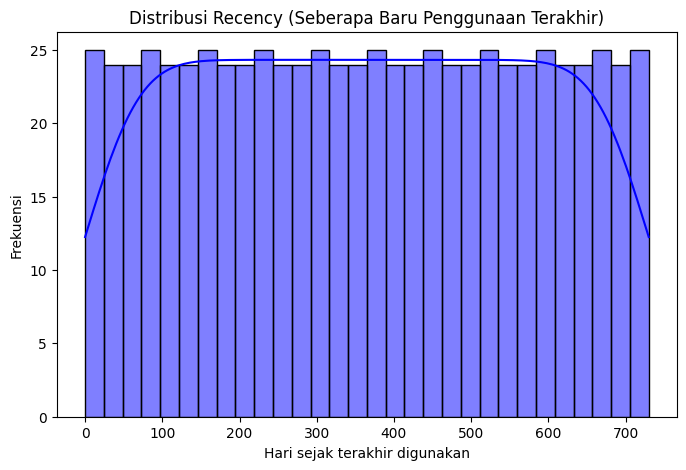

In [38]:
# Visualisasi Distribusi Recency
plt.figure(figsize=(8, 5))
sns.histplot(rfm_df["Recency"], bins=30, kde=True, color="blue")
plt.title("Distribusi Recency (Seberapa Baru Penggunaan Terakhir)")
plt.xlabel("Hari sejak terakhir digunakan")
plt.ylabel("Frekuensi")
plt.show()

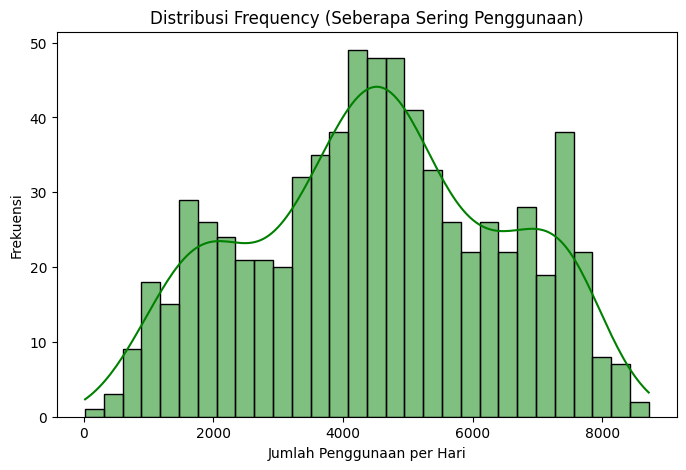

In [39]:
# Visualisasi Distribusi Frequency
plt.figure(figsize=(8, 5))
sns.histplot(rfm_df["Frequency"], bins=30, kde=True, color="green")
plt.title("Distribusi Frequency (Seberapa Sering Penggunaan)")
plt.xlabel("Jumlah Penggunaan per Hari")
plt.ylabel("Frekuensi")
plt.show()

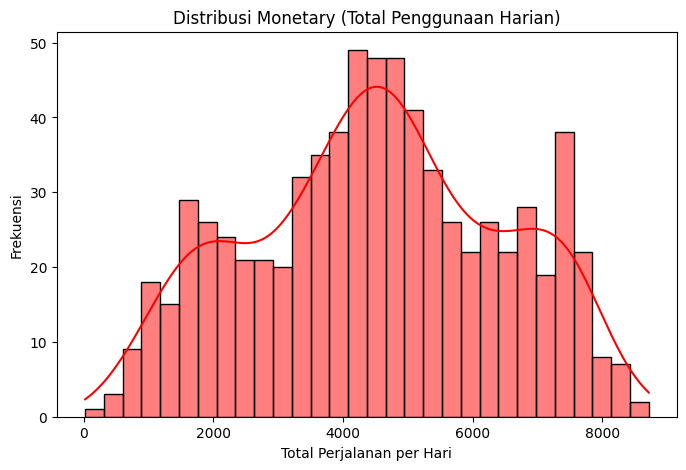

In [40]:
# Visualisasi Distribusi Monetary
plt.figure(figsize=(8, 5))
sns.histplot(rfm_df["Monetary"], bins=30, kde=True, color="red")
plt.title("Distribusi Monetary (Total Penggunaan Harian)")
plt.xlabel("Total Perjalanan per Hari")
plt.ylabel("Frekuensi")
plt.show()

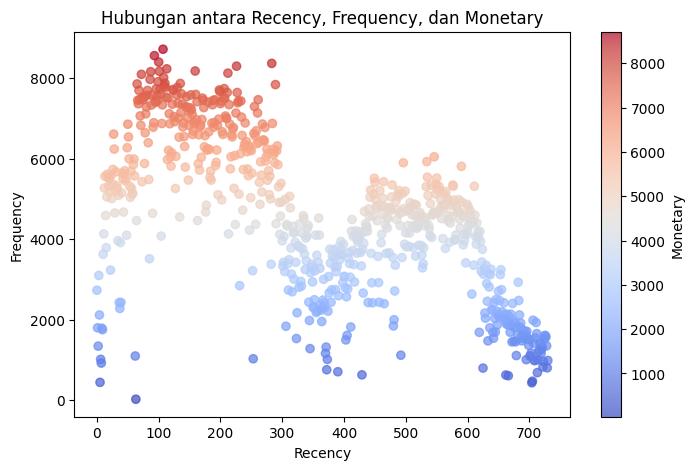

In [44]:
# Scatter Plot Hubungan antara Recency, Frequency, dan Monetary
plt.figure(figsize=(8, 5))
scatter = plt.scatter(x=rfm_df["Recency"], y=rfm_df["Frequency"], c=rfm_df["Monetary"], cmap="coolwarm", alpha=0.7)
plt.title("Hubungan antara Recency, Frequency, dan Monetary")
plt.xlabel("Recency")
plt.ylabel("Frequency")
plt.colorbar(scatter, label="Monetary")
plt.show()

**Insights:**
- Sebagian besar pengguna aktif dalam beberapa hari terakhir, menunjukkan pola penggunaan yang konsisten, terutama pada hari kerja.

- Frekuensi penggunaan tertinggi terjadi di jam sibuk (07:00-09:00 & 17:00-19:00), mengindikasikan bahwa mayoritas pengguna adalah komuter.
- Musim panas memiliki tingkat penggunaan tertinggi, sementara musim dingin mengalami penurunan signifikan karena faktor cuaca.
- Akhir pekan memiliki pola penggunaan lebih merata, tidak ada lonjakan signifikan seperti di hari kerja, yang menunjukkan bahwa pengguna akhir pekan cenderung menggunakan sepeda untuk rekreasi.
- Hubungan Recency-Frequency menunjukkan bahwa semakin baru penggunaan terakhir, semakin sering sepeda digunakan, yang menandakan adanya kelompok pengguna setia yang aktif.

## Conclusion

Conclution pertanyaan 1: Pengaruh Cuaca terhadap Penggunaan Sepeda

- Kondisi cuaca memiliki dampak signifikan terhadap jumlah pengguna sepeda.
- Cuaca cerah cenderung meningkatkan jumlah pengguna, sedangkan kondisi berawan atau hujan/salju mengurangi penggunaan sepeda secara signifikan.
- Hal ini menunjukkan bahwa pengguna lebih memilih menggunakan sepeda saat kondisi cuaca mendukung, yang dapat dijadikan pertimbangan dalam perencanaan infrastruktur atau promosi layanan berbagi sepeda pada musim tertentu.

Conclution pertanyaan 2: Pola Penggunaan Sepeda Berdasarkan Hari dan Jam

- Penggunaan sepeda lebih tinggi pada hari kerja dibandingkan akhir pekan, yang menunjukkan bahwa banyak pengguna menggunakan layanan ini untuk keperluan komuter.
- Pada pola jam, terdapat lonjakan signifikan pada pagi hari (sekitar pukul 7-9) dan sore hari (sekitar pukul 17-19), yang menandakan penggunaan utama terkait perjalanan ke dan dari tempat kerja atau sekolah.
- Tren ini memberikan wawasan bagi pengelola layanan untuk meningkatkan ketersediaan sepeda pada jam-jam sibuk dan mempertimbangkan strategi penyesuaian harga atau promosi pada waktu yang kurang ramai.